# Variations of McCall Model

Last update: Oct 15th, 2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## 1. Correlated Wage Offers

We start with the original McCall Model. Instead of assuming i.i.d. wage offers (and put a probability distribution on them), we assume that the wage offers are correlated. Suppose the transition probabilities of the states follow a Markov chain

$$
P = \left[\begin{array}{ccccc}
\rho & 1-\rho\\
\frac{1-\rho}{2} & \rho & \frac{1-\rho}{2} &\\
& \frac{1-\rho}{2} & \rho & \frac{1-\rho}{2}\\
\\
 &  &  & 1-\rho & \rho
\end{array}\right]
$$

How to formulate the value function?

In [3]:
# Preparations
n = 51
w_min, w_max = 10, 60
w_default = np.linspace(w_min, w_max, n)

In [4]:
c = 25       # Unemployment benefit
beta = 0.99  # Discount factor
rho = 0.8    # Persistence of wage offer

In [5]:
# Construct Markov chain
P = np.zeros((n, n))
for i in range(n):
    P[i, i] = rho
    if (i == 0):
        P[i, i + 1] = 1 - rho
    elif (i == (n - 1)):
        P[i, i - 1] = 1 - rho
    else:
        P[i, i - 1] = (1 - rho) / 2
        P[i, i + 1] = (1 - rho) / 2

### 1.1 solve with fixed-point

In [18]:
T = 1000
v = np.zeros((T, n))
w = w_default / (1 - beta)

# initialization
# is_accept = (w > c)
# v[0, :] = w * (is_accept == True) + c * (is_accept == False)


for i in range(T - 1):
    # Continuation value?
    # cont = c + beta * np.dot(P, np.transpose(v[i, :]))
    cont = np.zeros(n)
    for j in range(n):
        cont[j] += c
        for k in range(n):
            cont[j] += beta * (P[j, k] * v[i, k])
    # Accept/reject given state?
    is_accept = (w > cont)
    v[i + 1, :] = w * (is_accept == True) + cont * (is_accept == False)

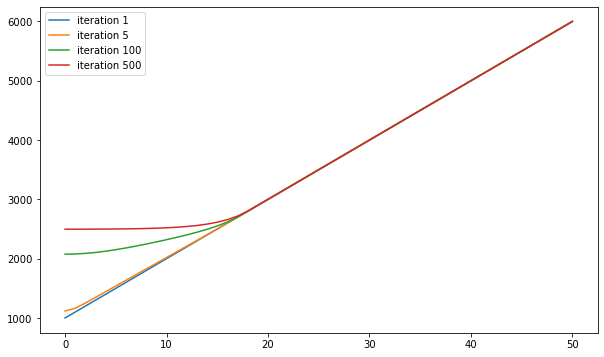

In [19]:
plt.figure(figsize = (10, 6))
t_series = [1, 5, 100, 500]
for i in t_series:
    plt.plot(v[i, :], label = f"iteration {i}")
plt.legend(loc = 'best')
plt.show()

### 1.2 solve with the limit of finite period solution

In [37]:
T = 2000
v = np.zeros((T, n))
v_accept = np.zeros(n)

# This block is indexing the value function backwards. In this way, the timing would be consistent
# with the lecture notes. However, it's a bit confusing to iterate backwards IN ANY CASE.
# Therefore, this block works; but only for reference.

# initialization
is_accept = (w_default > c)
v[T - 1, :] = w_default * (is_accept == True) + c * (is_accept == False)
v_accept = w_default

for i in range(T - 1):
    cur_idx = T - 1 - i 
    # If choose to accept, what value it would be?
    v_accept = w_default + beta * v_accept
    # Continuation value?
    cont = c + beta * np.dot(P, np.transpose(v[cur_idx, :]))
    # Accept/reject given state?
    is_accept = (v_accept > cont)
    v[cur_idx - 1, :] = v_accept * (is_accept == True) + cont * (is_accept == False)

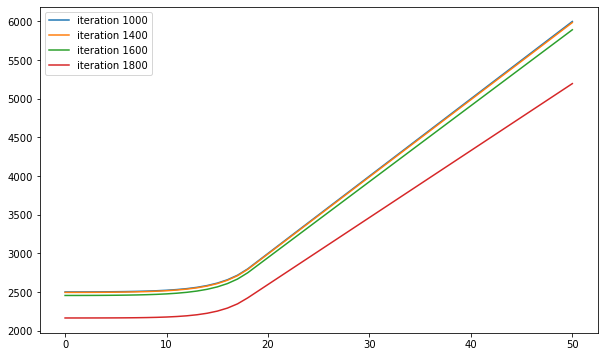

In [42]:
plt.figure(figsize = (10, 6))
t_series = [1000, 1400, 1600, 1800]
for i in t_series:
    plt.plot(v[i, :], label = f"iteration {i}")
plt.legend(loc = 'best')
plt.show()

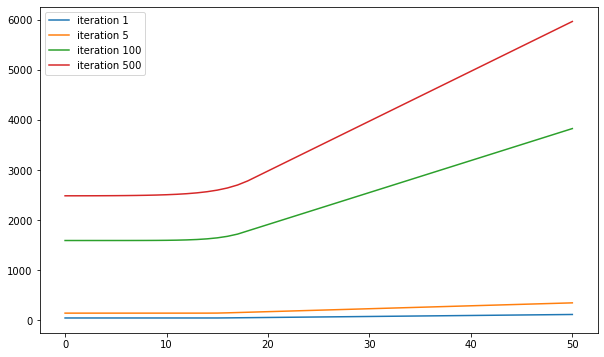

In [44]:
## Using the same timing as what we had in the last class,

T = 2000
v = np.zeros((T, n))
v_accept = np.zeros(n)

# initialization
is_accept = (w_default > c)
v[0, :] = w_default * (is_accept == True) + c * (is_accept == False)
v_accept = w_default

for i in range(T - 1):
    # If choose to accept, what value it would be?
    v_accept = w_default + beta * v_accept
    # Continuation value?
    cont = c + beta * np.dot(P, np.transpose(v[i, :]))
    # Accept/reject given state?
    is_accept = (v_accept > cont)
    v[i + 1, :] = v_accept * (is_accept == True) + cont * (is_accept == False)
    

plt.figure(figsize = (10, 6))
t_series = [1, 5, 100, 500]
for i in t_series:
    plt.plot(v[i, :], label = f"iteration {i}")
plt.legend(loc = 'best')
plt.show()

## 2. On-the-job Search

Assume the currently unemployed agents will still receive a wage for free. However, for currently employed agents, they can choose to pay a cost $f$ to draw a wage offer again at the beginning of every period. They can choose to stay on their current job, or switch to the new job they find.

In [11]:
# Preparations and parameterization
n, a, b = 51, 200, 100                        # default parameters
q_default = stats.betabinom(n, a, b).pmf      # probability mass function

In [12]:
w_min, w_max = 10, 60
w_default = np.linspace(w_min, w_max, n)
q_grid = q_default(w_default)

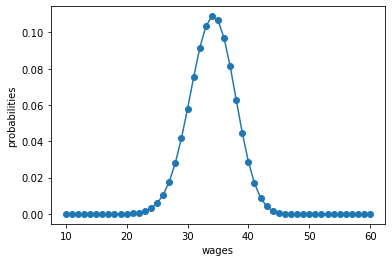

In [13]:
fig, ax = plt.subplots()
ax.plot(w_default, q_grid, '-o')
ax.set_xlabel('wages')
ax.set_ylabel('probabilities')

plt.show()

In [14]:
c = 25       # Unemployment benefit
beta = 0.99  # Discount factor
s = 40       # On-the-job search cost